In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [118]:
img = cv2.imread('images/sample1.jpg',0)

(360, 640)


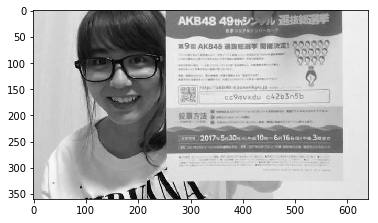

In [121]:
print(img.shape)
plt.imshow(img, cmap='gray')

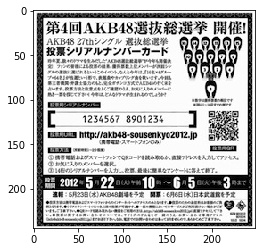

In [131]:
cropped_image = cv2.imread('images/sample3.jpg',0)
plt.imshow(cropped_image, cmap='gray')

In [112]:
cv2.imwrite('outputs/cropped3.jpg',cropped_image)

True

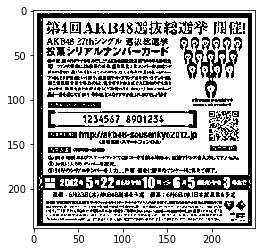

In [132]:
th2 = cv2.adaptiveThreshold(cropped_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,10)
plt.imshow(th2, cmap='gray')

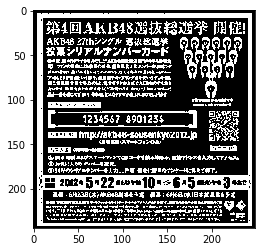

In [133]:
th3 = cv2.bitwise_not(th2)
# th3[95:135,100:400] = 0
plt.imshow(th3, cmap='gray')

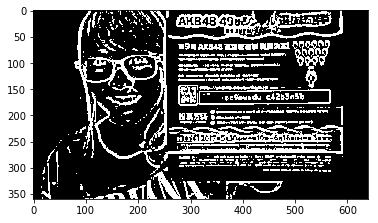

In [125]:
kernel = np.ones((2,2),np.uint8)
dilate_th3 = cv2.dilate(th3, kernel,iterations=1)
plt.imshow(dilate_th3, cmap='gray')

284


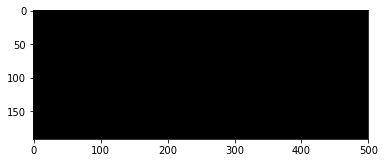

In [69]:
contours = cv2.findContours(th3,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

all_contours = contours[1]
print(len(all_contours))
image = np.zeros_like(cropped_image)
for contour in all_contours:
    if len(contour) > 4 or cv2.contourArea(contour) < 10:
        continue
    print(cv2.contourArea(contour), contour)
    cv2.drawContours(image, [contour],-1,(255,255,0),3)

plt.imshow(image, cmap='gray')

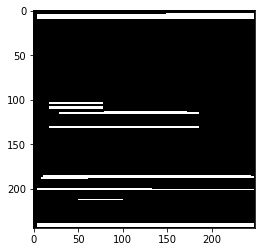

In [138]:
kernel = np.ones((2,2),np.uint8)
horizontalsize = np.int(th3.shape[0]/5.)
horizontalstructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize, 1))
erode = cv2.erode(th3,horizontalstructure,iterations = 1)
dilate_h = cv2.dilate(erode, horizontalstructure, iterations = 1)
dilate_h = cv2.dilate(dilate_h,kernel,iterations = 1)
plt.imshow(dilate_h, cmap='gray')

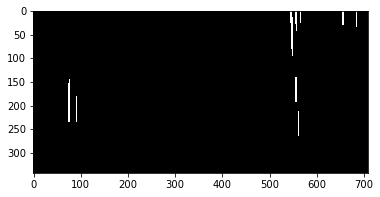

In [8]:
kernel = np.ones((3,3),np.uint8)
verticalsize = np.int(th3.shape[1]/15)
verticalstructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1,verticalsize))
erode = cv2.erode(th3,verticalstructure,iterations = 1)
dilate_v = cv2.dilate(erode, verticalstructure, iterations = 1)
dilate_v = cv2.dilate(dilate_v,kernel,iterations = 1)
plt.imshow(dilate_v, cmap='gray')

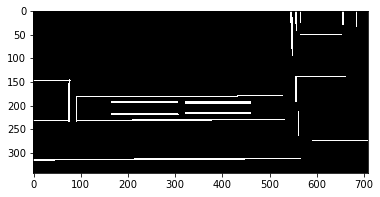

In [9]:
structure_mix = cv2.bitwise_or(dilate_h,dilate_v)
plt.imshow(structure_mix, cmap='gray')

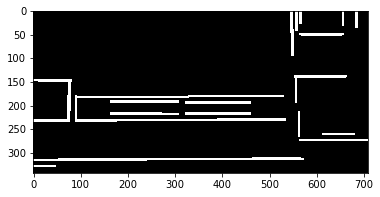

In [10]:
kernel = np.ones((3,3),np.uint8)
bound_dilate = cv2.dilate(structure_mix, kernel, iterations=1)
plt.imshow(bound_dilate,cmap='gray')

5
72.0 [[[ 22  82]]

 [[ 22 118]]

 [[ 24 118]]

 [[ 24  82]]]


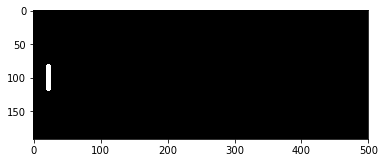

In [135]:
contours = cv2.findContours(bound_dilate,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

all_contours = contours[1]
print(len(all_contours))
image = np.zeros_like(cropped_image)
for contour in all_contours:
    if len(contour) > 4 or cv2.contourArea(contour) < 10:
        continue
    print(cv2.contourArea(contour), contour)
    cv2.drawContours(image, [contour],-1,(255,255,0),3)

plt.imshow(image, cmap='gray')

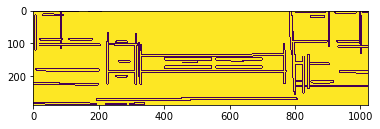

In [12]:
thresh = cv2.adaptiveThreshold(structure_mix,120,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,7,3)
plt.imshow(thresh)

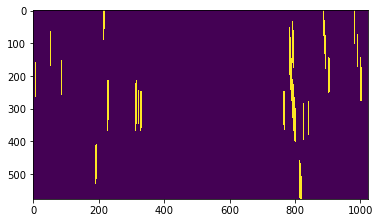

In [30]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(dilate_v,kernel,iterations = 1)
plt.imshow(dilation)

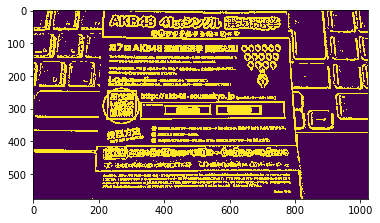

In [100]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(th3,kernel,iterations = 1)
plt.imshow(dilation)

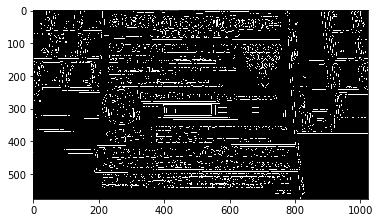

In [98]:
edges = cv2.Canny(dilation,50,150,apertureSize = 3)
plt.imshow(edges, cmap='gray')

In [49]:
len(cv2.HoughLines(edges,1,np.pi/180,200))

35

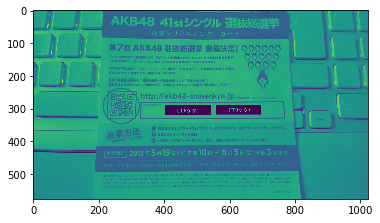

In [273]:
plt.imshow(img)

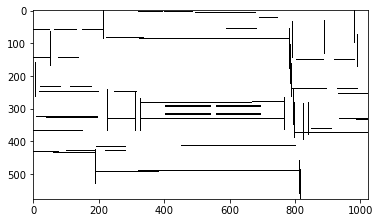

In [116]:
plt.imshow(cv2.bitwise_not(structure_mix), cmap='gray')

In [115]:
cv2.imwrite('outputs/frames.png', structure_mix)

True

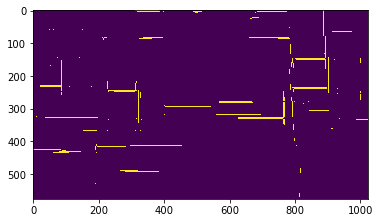

In [93]:
canny = cv2.Canny(structure_mix,100,10)
plt.imshow(canny)

In [170]:
image = cropped_image.copy()
lines = cv2.HoughLines(bound_dilate,1,np.pi/180,450)
print(len(lines))
for line in lines:
    rho,theta = line[0]
    theta = np.pi/2
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.imshow(image)

TypeError: object of type 'NoneType' has no len()

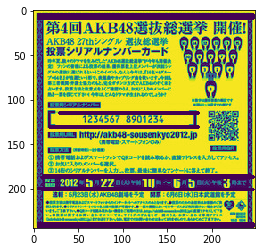

In [139]:
minLineLength = 100
maxLineGap = 10
image = cropped_image.copy()
lines = cv2.HoughLinesP(dilate_h,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    
plt.imshow(image)

In [140]:
dist = [l2_dist(x) for x in lines]
np.argsort(dist)

array([20, 18, 17, 16, 19, 14,  7,  5, 11, 15, 13, 12,  0,  8,  6,  4,  3,
        2,  1,  9, 10], dtype=int64)

In [141]:
lines[10]

array([[  5, 241, 247, 241]], dtype=int32)

[array([  5, 241], dtype=int32), array([247, 241], dtype=int32), array([5, 8], dtype=int32), array([247,   8], dtype=int32)]


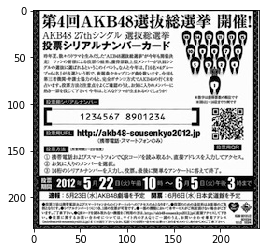

In [142]:
def l2_dist(line):
    x1,y1,x2,y2 = line[0]
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def on_same_line(line1, line2, threshold = 20):
    x1,y1,x2,y2 = line1
    x3,y3,x4,y4 = line2
    return np.abs(y3 - y1) < threshold
#     a = (y2-y1)/(x2-x1)
#     b = (y1 * x2 - y2 * x1)/(x2-x1)
#     err = np.abs(a * x3 + b - y3) + np.abs(a * x4 + b - y4)

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(dilate_h,1,np.pi/180,100,minLineLength,maxLineGap)
image = cropped_image.copy()
line_pairs = []
for i in np.flip(np.argsort(dist),0):
    now_line = lines[i][0]
    for j in np.flip(np.argsort(dist),0):
        if i == j:
            continue
        else:
            test_line = lines[j][0]
            if not on_same_line(now_line, test_line) and \
            (np.abs(now_line[0]-test_line[0]) < 10 and np.abs(now_line[2]-test_line[2]) < 10):
                line_pairs.append((now_line, test_line))
                break
                
first_pair = line_pairs[0]
four_points = [first_pair[0][:2],first_pair[0][2:],first_pair[1][:2],first_pair[1][2:]]
idx_order = np.argsort([x[0]+x[1] for x in four_points])
top_left = four_points[idx_order[0]]
below_right = four_points[idx_order[-1]]
print(four_points)
cv2.imwrite('outputs/cropped.jpg',cropped_image[top_left[1]:below_right[1],top_left[0]:below_right[0]])
plt.imshow(cropped_image[top_left[1]:below_right[1],top_left[0]:below_right[0]], cmap='gray')

In [130]:
cropped_image[top_left[1]:below_right[1],top_left[0]:below_right[0]]

array([[224, 225, 226, ..., 206, 180, 188],
       [220, 221, 223, ..., 207, 179, 187],
       [218, 218, 219, ..., 208, 179, 186],
       ...,
       [232, 232, 231, ..., 166, 184, 200],
       [232, 232, 233, ..., 196, 209, 219],
       [202, 202, 203, ..., 220, 215, 210]], dtype=uint8)

In [80]:
lines[40]

array([[510, 229, 538, 229]], dtype=int32)

0 311 576 311
heelo
86 229
heelo
88 177
heelo
91 227
heelo
88 185
heelo
88 186
heelo
133 184
heelo
210 177
heelo
86 231
heelo
187 232
heelo
190 183
heelo
298 177
heelo
88 184
heelo
86 233
heelo
333 230
heelo
88 183
heelo
211 178
heelo
382 177
heelo
262 229
heelo
390 230
heelo
86 235
heelo
205 228
heelo
453 229
heelo
317 232
heelo
430 230
heelo
265 231
heelo
143 231
heelo
152 229
heelo
442 234
heelo
439 232
heelo
484 235
heelo
309 227
heelo
108 228
heelo
205 236
heelo
146 177
heelo
268 177
heelo
510 229
[(510, 229), (538, 229)]


C:\Anaconda\envs\chatbot\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


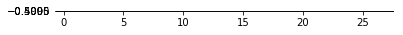

In [70]:
def l2_dist(line):
    x1,y1,x2,y2 = line[0]
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def on_same_line(line1, line2, threshold = 20):
    x1,y1,x2,y2 = line1
    x3,y3,x4,y4 = line2
    return np.abs(y3 - y1) < threshold
#     a = (y2-y1)/(x2-x1)
#     b = (y1 * x2 - y2 * x1)/(x2-x1)
#     err = np.abs(a * x3 + b - y3) + np.abs(a * x4 + b - y4)

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(dilate_h,1,np.pi/180,100,minLineLength,maxLineGap)
image = cropped_image.copy()
dist = [l2_dist(x) for x in lines]
line_count = 0
four_points = []

for idx, line_idx in enumerate(np.flip(np.argsort(dist),0)):
    now_line = lines[line_idx][0]
    x1,y1,x2,y2 = now_line
    if idx != 0:
        if on_same_line(now_line, prev_line):
            continue
        elif np.abs(x1-prev_line[0]) > 20 or np.abs(x2-prev_line[2]) > 20:
            print('heelo')
            four_points = [(x1,y1),(x2,y2)]
            prev_x1, prev_y1 = x1 + 0, y1 + 0
            print(prev_x1, prev_y1)
            prev_lenght = dist[line_idx]
            continue
        print(x1,y1,x2,y2)
        line_count += 1
    else:
        print(x1,y1,x2,y2)
        line_count += 1
    prev_lenght = dist[line_idx]
    prev_line = [x1,y1,x2,y2]
    four_points.extend([(x1,y1),(x2,y2)])
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    if line_count == 2:
        break

idx_order = np.argsort([x[0]+x[1] for x in four_points])
top_left = four_points[idx_order[0]]
below_right = four_points[idx_order[-1]]
print(four_points)
cv2.imwrite('outputs/cropped.jpg',cropped_image[top_left[1]:below_right[1],top_left[0]:below_right[0]])
plt.imshow(cropped_image[top_left[1]:below_right[1],top_left[0]:below_right[0]], cmap='gray')

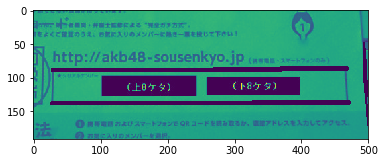

In [132]:
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(bound_dilate,1,np.pi/180,100,minLineLength,maxLineGap)
image = cropped_image.copy()
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(image)

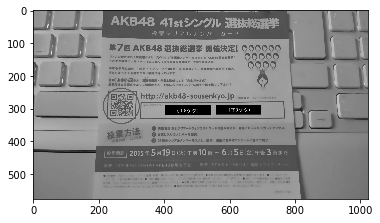

In [226]:
plt.imshow(cv2.bilateralFilter(gray, 11, 17, 17), cmap='gray')

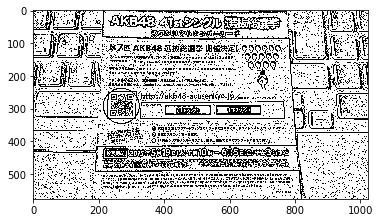

In [224]:
th3 = cv2.adaptiveThreshold(gray,120,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th3,cmap='gray')

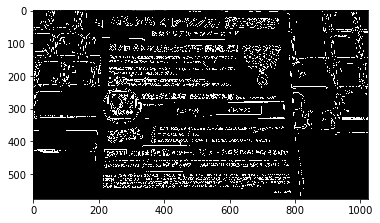

In [220]:
edges = cv2.Canny(img,100,10)
plt.imshow(edges, cmap='gray')

In [218]:
minLineLength = 10
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
image = img.copy()
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(image)

In [61]:
image = img.copy()
lines = cv2.HoughLines(edges,0.5,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)

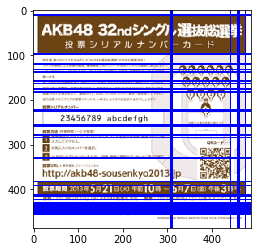

In [62]:
plt.imshow(image)

In [79]:
edges.shape

(487, 487)

345.0 [[[220 282]]

 [[220 287]]

 [[289 287]]

 [[289 282]]]
266.0 [[[261 153]]

 [[261 160]]

 [[299 160]]

 [[299 153]]]
282.0 [[[847  17]]

 [[847  23]]

 [[894  23]]

 [[894  17]]]
436.0 [[[  5  13]]

 [[  5 122]]

 [[  9 122]]

 [[  9  13]]]


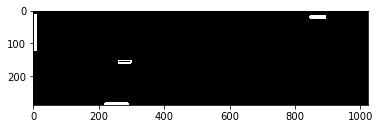

In [33]:
contours = cv2.findContours(structure_mix,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

all_contours = contours[1]
image = np.zeros_like(cropped_image)
for contour in all_contours:
    if len(contour) > 4 or cv2.contourArea(contour) < 10:
        continue
    print(cv2.contourArea(contour), contour)
    cv2.drawContours(image, [contour],-1,(255,255,0),3)

plt.imshow(image, cmap='gray')

In [244]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

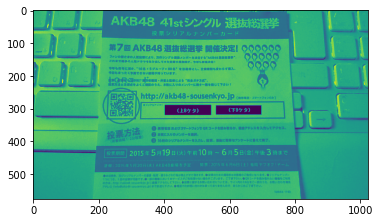

In [245]:
plt.imshow(blurred)

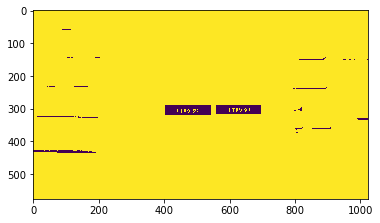

In [250]:
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)

In [11]:
cnts = cv2.findContours(blurred.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
cnts

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 [array([[[  0,   0]],
  
         [[  0, 486]],
  
         [[486, 486]],
  
         [[486,   0]]], dtype=int32)],
 array([[[-1, -1, -1, -1]]], dtype=int32))

In [24]:
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]))
	cY = int((M["m01"] / M["m00"]))
	shape = sd.detect(c)
 
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the img
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
	cv2.putText(img, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)
 
	# show the output img
	cv2.imshow("img", img)
	cv2.waitKey(0)

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2515: error: (-215) npoints > 0 in function cv::drawContours
